In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
df.head(10)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


Cek jumlah kolom dan total data

In [4]:
df.shape

(13169, 13)

Cek data duplikat

In [5]:
df.duplicated().sum()

125

Membersihkan data duplikat

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

Jumlah data setelah dibersihkan data duplikatnya

In [8]:
df.shape

(13044, 13)

Jumlah data menjadi 13044 data setelah dibersihkan data duplikatnya

Cek missing values

In [9]:
df.isna()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()/df.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

Tidak ada data yang mengalami missing value karena persentase dari setiap kolom adalah 0

In [11]:
df_tweet = df['Tweet']
df_tweet

0        - disaat semua cowok berusaha melacak perhatia...
1        RT USER: USER siapa yang telat ngasih tau elu?...
2        41. Kadang aku berfikir, kenapa aku tetap perc...
3        USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13164    USER jangan asal ngomong ndasmu. congor lu yg ...
13165                         USER Kasur mana enak kunyuk'
13166    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167    USER USER USER USER Bom yang real mudah terdet...
13168    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13044, dtype: object

Function cleasnsing data:
1. membuat semua huruf menjadi huruf kecil (lowercase)
2. menghilangkan karakter selain angka dan huruf
3. menghilangkan kata 'user' karena konteks data adalah dari twitter, dan mengandung banyak kata 'user' yang tidak masuk dalam konteks tweet
4. menghilangkan spasi yang terlalu panjang

In [12]:
def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-z0-9A-Z]', ' ', string)
    string = re.sub('user', '', string)
    string = re.sub('\t', '', string)
    return string

Menerapkan function untuk membersihkan data dan membuat kolom baru berupa data yang sudah dibersihkan

In [13]:
df['tweet_clean'] = df['Tweet'].apply(cleansing)
df['tweet_clean']

0          disaat semua cowok berusaha melacak perhatia...
1        rt    siapa yang telat ngasih tau elu edan sar...
2        41  kadang aku berfikir  kenapa aku tetap perc...
3          aku itu aku n nku tau matamu sipit tapi dili...
4          kaum cebong kapir udah keliatan dongoknya da...
                               ...                        
13164     jangan asal ngomong ndasmu  congor lu yg seka...
13165                              kasur mana enak kunyuk 
13166     hati hati bisu     g n nlagi bosan huft  xf0 ...
13167        bom yang real mudah terdeteksi bom yang te...
13168     mana situ ngasih    itu cuma foto ya kutil onta 
Name: tweet_clean, Length: 13044, dtype: object

In [14]:
df[['Tweet', 'tweet_clean']]

,Tweet,tweet_clean
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat ngasih tau elu edan sar...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi dili...
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya da...
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal ngomong ndasmu congor lu yg seka...
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu g n nlagi bosan huft xf0 ...
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang te...


In [15]:
df[['tweet_clean']]


,tweet_clean
0,disaat semua cowok berusaha melacak perhatia...
1,rt siapa yang telat ngasih tau elu edan sar...
2,41 kadang aku berfikir kenapa aku tetap perc...
3,aku itu aku n nku tau matamu sipit tapi dili...
4,kaum cebong kapir udah keliatan dongoknya da...
...,...
13164,jangan asal ngomong ndasmu congor lu yg seka...
13165,kasur mana enak kunyuk
13166,hati hati bisu g n nlagi bosan huft xf0 ...
13167,bom yang real mudah terdeteksi bom yang te...


Mencari jumlah karakter pada setiap tweet

In [16]:
df['total_char'] = df.tweet_clean.apply(len)

In [17]:
df[['tweet_clean', 'total_char']]

,tweet_clean,total_char
0,disaat semua cowok berusaha melacak perhatia...,138
1,rt siapa yang telat ngasih tau elu edan sar...,112
2,41 kadang aku berfikir kenapa aku tetap perc...,254
3,aku itu aku n nku tau matamu sipit tapi dili...,67
4,kaum cebong kapir udah keliatan dongoknya da...,81
...,...,...
13164,jangan asal ngomong ndasmu congor lu yg seka...,57
13165,kasur mana enak kunyuk,24
13166,hati hati bisu g n nlagi bosan huft xf0 ...,58
13167,bom yang real mudah terdeteksi bom yang te...,119


Mencari jumlah kata dalam setiap tweet

In [18]:
df['total_word'] = df.tweet_clean.apply(lambda sent: len(sent.split()))

In [19]:
df[['tweet_clean', 'total_char', 'total_word']]

,tweet_clean,total_char,total_word
0,disaat semua cowok berusaha melacak perhatia...,138,21
1,rt siapa yang telat ngasih tau elu edan sar...,112,20
2,41 kadang aku berfikir kenapa aku tetap perc...,254,38
3,aku itu aku n nku tau matamu sipit tapi dili...,67,14
4,kaum cebong kapir udah keliatan dongoknya da...,81,12
...,...,...,...
13164,jangan asal ngomong ndasmu congor lu yg seka...,57,9
13165,kasur mana enak kunyuk,24,4
13166,hati hati bisu g n nlagi bosan huft xf0 ...,58,12
13167,bom yang real mudah terdeteksi bom yang te...,119,18


In [20]:
new_df = df[['tweet_clean', 'total_char', 'total_word']]

In [21]:
new_df.head()

,tweet_clean,total_char,total_word
0,disaat semua cowok berusaha melacak perhatia...,138,21
1,rt siapa yang telat ngasih tau elu edan sar...,112,20
2,41 kadang aku berfikir kenapa aku tetap perc...,254,38
3,aku itu aku n nku tau matamu sipit tapi dili...,67,14
4,kaum cebong kapir udah keliatan dongoknya da...,81,12


In [22]:
new_df.shape

(13044, 3)

Mean total karakter dan total kata

In [23]:
new_df[['total_char', 'total_word']].mean()

total_char    109.330420
total_word     17.163523
dtype: float64

Median total karakter dan total kata

In [24]:
new_df[['total_char', 'total_word']].median()

total_char    94.0
total_word    15.0
dtype: float64

Mode total karakter

In [25]:
new_df['total_char'].mode()

0    254
Name: total_char, dtype: int64

Mode total kata

In [26]:
new_df['total_word'].mode()

0    10
Name: total_word, dtype: int64

Range

In [27]:
# range jumlah kata

range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

121

Selisih jumlah kata antara tweet terpanjang dan tweet terpendek adalah sebesar 121 kata

In [28]:
# range jumlah karakter

range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

553

Selisih jumlah karakter antara tweet terpanjang dan tweet terpendek adalah sebesar 553 kata

In [29]:
# min max jumlah kata

word_min = df.total_word.min()
print(word_min)
word_max = df.total_word.max()
print(word_max)

0
121


Jumlah kata minimal dalam data tweet adalah 0 dan jumlah kata maksimal adalah 121 kata

In [30]:
# min max jumlah karakter

char_min = df.total_char.min()
print(char_min)
char_max = df.total_char.max()
print(char_max)

4
557


Jumlah karakter minimal dalam data tweet adalah 4 karakter dan jumlah karakter maksimal adalah 557 karakter

Quartile & Interquartile

In [31]:
# quartile & interquartile jumlah kata

q1_word = df.total_word.quantile(0.25)
q2_word = df.total_word.quantile(0.5)
q3_word = df.total_word.quantile(0.75)
print(q1_word, q2_word, q3_word)
iqr_word = q3_word - q1_word
print(iqr_word)


9.0 15.0 23.0
14.0


In [32]:
# quartile & interquartile jumlah karakter

q1_char = df.total_char.quantile(0.25)
q2_char = df.total_char.quantile(0.5)
q3_char = df.total_char.quantile(0.75)
print(q1_char, q2_char, q3_char)
iqr_char = q3_char - q1_char
print(iqr_char)

54.0 94.0 146.0
92.0


In [33]:
lower_limit_word = q1_word-1.5*iqr_word
upper_limit_word = q3_word+1.5*iqr_word
print("Batas bawah 'total_word':", lower_limit_word)
print('Nilai minimum:', word_min)

if lower_limit_word < word_min:
    print('Tidak ada outlier dari sisi batas bawah')
else:
    print('Ada outlier dari sisi batas bawah')

print()
print("Batas atas 'total_word':", upper_limit_word)
print('Nilai maksimum:', word_max)

if upper_limit_word > word_max:
    print('Tidak ada outlier dari sisi batas atas')
else:
    print('Ada outlier dari sisi batas atas')

Batas bawah 'total_word': -12.0
Nilai minimum: 0
Tidak ada outlier dari sisi batas bawah

Batas atas 'total_word': 44.0
Nilai maksimum: 121
Ada outlier dari sisi batas atas


In [34]:
lower_limit_char = q1_char-1.5*iqr_char
upper_limit_char = q3_char+1.5*iqr_char
print("Batas bawah 'total_char':", lower_limit_char)
print('Nilai minimum:', char_min)

if lower_limit_char < char_min:
    print('Tidak ada outlier dari sisi batas bawah')
else:
    print('Ada outlier dari sisi batas bawah')

print()
print("Batas atas 'total_char':", upper_limit_char)
print('Nilai maksimum:', char_max)

if upper_limit_char > char_max:
    print('Tidak ada outlier dari sisi batas atas')
else:
    print('Ada outlier dari sisi batas atas')

Batas bawah 'total_char': -84.0
Nilai minimum: 4
Tidak ada outlier dari sisi batas bawah

Batas atas 'total_char': 284.0
Nilai maksimum: 557
Ada outlier dari sisi batas atas


In [35]:
df[['total_word', 'total_char']].mean()

total_word     17.163523
total_char    109.330420
dtype: float64

In [36]:
df[['total_word', 'total_char']].var()

total_word     122.530875
total_char    4788.538211
dtype: float64

In [37]:
df[['total_word', 'total_char']].std()

total_word    11.069367
total_char    69.199265
dtype: float64

In [38]:
df[['total_word', 'total_char']].skew()

total_word    0.881591
total_char    0.723635
dtype: float64

In [39]:
df[['total_word', 'total_char']].kurtosis()

total_word    0.570918
total_char   -0.340051
dtype: float64

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

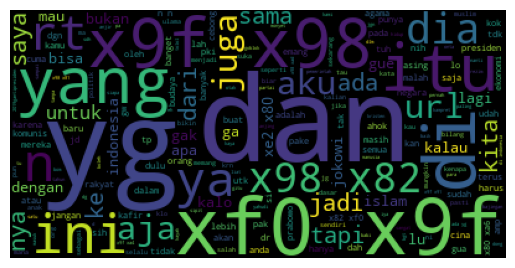

In [41]:
text = ' '.join(df['tweet_clean'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [42]:
df[['total_char', 'total_word']].corr()

,total_char,total_word
total_char,1.000000,0.966943
total_word,0.966943,1.000000


<Axes: xlabel='total_word', ylabel='total_char'>

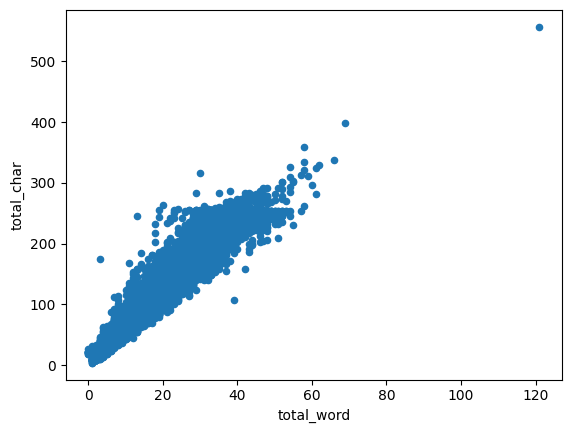

In [43]:
df[['total_char', 'total_word']].plot(x='total_word', y='total_char', kind='scatter')